<a href="https://colab.research.google.com/github/Braian8825/Clasificador-Naive-Bayes/blob/main/Modelo_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador y generador de dígitos utilizando el modelo de clasificación Naive Bayes

#**Introducción**


El modelo de Naive Bayes es un algoritmo de aprendizaje automático supervisado utilizado en tareas de clasificación y clasificación de texto. Se basa en el teorema de Bayes, que es un principio de probabilidad condicional que describe cómo se pueden actualizar las creencias o probabilidades sobre un evento dado la evidencia observada.

La "ingenuidad" en el nombre del modelo proviene de la suposición de independencia condicional, que es una simplificación fuerte pero útil que se hace en el modelo. En otras palabras, el modelo asume que todas las características utilizadas para la clasificación son independientes entre sí, lo que es poco realista en la mayoría de las aplicaciones del mundo real. A pesar de esta suposición simplificada, el modelo de Naive Bayes a menudo funciona sorprendentemente bien en muchas tareas de clasificación, como la clasificación de spam, la clasificación de documentos, la detección de sentimientos y más.


El modelo de Naive Bayes se basa en el teorema de Bayes y utiliza la siguiente fórmula para realizar la clasificación:

$$Pr(C|X)=\frac{Pr(C)Pr(X|C)}{Pr(X)}$$

donde:



* $Pr(C|X)$ es la probabilidad condicional de que un ejemplo pertenezca a la clase $C$ dado un conjunto de características $X$.
* $Pr(C)$ es la probabilidad apriori de la clase $C$.
* $Pr(X|C)$ es la probabilidad de que las características $X$ se observen dado que el ejemplo pertenece a la clase $C$.
* $Pr(X)$ es la probabilidad marginal de observar las características $X$.

El modelo de Naive Bayes calcula $Pr(C|X)$ para cada clase posible y asigna el ejemplo a la clase con la probabilidad condicional más alta.


Las tres variantes más comunes del modelo de Naive Bayes son:



1. Naive Bayes Gaussiano: Asume que las características siguen una distribución normal (gaussiana).

2. Naive Bayes Multinomial: Se utiliza comúnmente en tareas de clasificación de texto, como clasificación de documentos y detección de spam, donde las características son recuentos de palabras o frecuencias de términos.

3. Naive Bayes Bernoulli: Se utiliza para características binarias, como la presencia o ausencia de ciertos términos en un documento.

#**Ventajas y Desventajas del Clasificador Naive Bayes**

#Ventajas:

1. Simplicidad y facilidad de implementación: El modelo de Naive Bayes es fácil de entender y de implementar. Su simplicidad lo hace adecuado para problemas de clasificación rápidos y sencillos.

2. Eficiencia computacional: Naive Bayes es un modelo computacionalmente eficiente, lo que significa que puede funcionar rápidamente en grandes conjuntos de datos. Es especialmente útil en aplicaciones en tiempo real.

3. Manejo de datos de alta dimensionalidad: El modelo es robusto en entornos con un gran número de características o dimensiones, como en la clasificación de texto con un gran vocabulario.

4. Requiere menos datos de entrenamiento: En comparación con algunos otros modelos de aprendizaje automático, Naive Bayes puede funcionar bien incluso con conjuntos de datos más pequeños.

5. Buen rendimiento en clasificación de texto: Naive Bayes se utiliza comúnmente en tareas de procesamiento de lenguaje natural, como la clasificación de documentos y la detección de spam, donde ha demostrado un buen rendimiento.

#Desventajas:

1. Suposición de independencia condicional: La principal desventaja del modelo es la suposición de independencia condicional entre las características, que rara vez se cumple en situaciones del mundo real. Esto puede llevar a resultados subóptimos en problemas donde las características están altamente correlacionadas.

2. Sensible a características irrelevantes: Naive Bayes puede verse afectado por la presencia de características irrelevantes o ruido en los datos, ya que asume que todas las características son igualmente importantes.

3. No maneja bien datos numéricos continuos: El modelo de Naive Bayes no funciona bien con datos numéricos continuos, a menos que se realice una discretización previa de los mismos.

4. Baja capacidad de representación: Naive Bayes tiene una capacidad de representación limitada y no puede capturar relaciones complejas en los datos. Por lo tanto, puede no ser adecuado para problemas donde se requiere un alto nivel de complejidad en la clasificación.

5. Necesita suficientes ejemplos de cada clase: El rendimiento del modelo depende de la disponibilidad de ejemplos suficientes para cada clase en el conjunto de entrenamiento. Si una clase tiene pocos ejemplos, el modelo puede tener dificultades para hacer predicciones precisas para esa clase.


#**Objetivo**

Utilizar el método de clasificación Naive Bayes y ejemplificar todo el procedimiento para hacer un buen uso de este por medio de la base de datos MINST que contiene un conjunto de 70,000 imágenes en escala de grises, cada una de 28x28 píxeles. Estas imágenes representan dígitos escritos a mano del 0 al 9 y cada imagen tiene una etiqueta asociada que indica qué número representa (0, 1, 2, ..., 9).

Los pasos del método de clasificación utiliando Naive Bayes son los siguientes:

1. Recopilación de datos de entrenamiento.
2. Preprocesamiento de datos.
3. Separación de datos.
4. Estimación de las probabilidades.
5. Entrenamiento del modelo.
6. Clasificación de nuevos ejemplos.
7. Evaluación del modelo.
8. Ajuste y optimización.
9. Despliegue.

Es importante recordar que el éxito de un modelo de Naive Bayes depende en gran medida de la calidad de los datos y de la idoneidad de la suposición de independencia condicional para el problema en cuestión. En muchos casos, Naive Bayes puede ser una opción efectiva y eficiente para tareas de clasificación.

Es claro que el objetivo del modelo no es a realizar la implementación, pero si se nombrará la forma de ser aplicado a medida que el proceso de construcción del modelo avance. Luego de utilizar los pasos al final del cuaderno el lector puede observar que el modelo de clasificación Naive Bayes aplicado a la base de datos MINST genera buenos resultados.

## **1. Adquisición de datos**

Reúne un conjunto de datos de entrenamiento que contenga ejemplos etiquetados, donde cada ejemplo pertenezca a una de las clases de interés. Cada ejemplo debe estar representado por un conjunto de características que describan las propiedades relevantes del objeto a clasificar.



In [1]:
#Activar las librerias:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import random
warnings.filterwarnings("ignore")

In [2]:
#Carga de los datos
datos = fetch_openml('mnist_784') #Se guarda la base de datos en la variable datos

In [3]:
datos.data #Se muestran los datos.

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se evidencia de la tabla de datos anterior que existen 784 columnas debido a los 28X28 pixeles, donde cada pixel es una varaible y 70 mil imágenes o individuos.

## **2. Preprocesamiento de los datos**

La etapa de limpieza de datos representa un paso fundamental en el proceso de minería de datos, ya que es en este punto donde surgen las primeras problemáticas relacionadas con la calidad de los datos. La corrección de estos problemas es crucial para asegurar la confiabilidad de los resultados que el modelo producirá en el futuro. En este proceso, se inicia verificando la coherencia de los tipos de datos en cada columna y se comprueba si cumplen con las expectativas. Se examina la presencia de valores nulos, celdas vacías o duplicados, y se realiza un análisis para determinar si los datos se encuentran dentro de los rangos apropiados. En el contexto de los píxeles, por ejemplo, se espera que todos los valores sean números enteros y se sitúen en el intervalo de 0 a 255.

Se revisa el tipo de variables que contiene la base de datos:

In [4]:
try:
    datos.data.astype('int').astype(int) # son números enteros
    es_entero = True
except ValueError: # al menos un valor no es un número entero
    es_entero = False

if es_entero:
    print("Los datos contiene solo números enteros.")
else:
    print("Los datos no contiene solo números enteros.")

Los datos contiene solo números enteros.


In [5]:
datos.data.info() #Información de la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


Se muestra que la base de datos usada es consistente ya que no contiene valores nulos, vacíos ni filas duplicadas, tampoco tiene valores mayores a 255 o menores a 0, donde el rango de los datos es desde 0 hasta 255:

In [6]:
print("Valores faltantes o nulos:", datos.data.isnull().sum().sum())
print("Valores faltantes o nulos:", datos.data.isna().sum().sum())
print("Filas duplicadas:", datos.data.duplicated().sum())
print("cantidad de valores menores a cero:", sum(datos.data.min() < 0))
print("cantidad de valores mayores a 255:", sum(datos.data.max() > 255))
np.sort(datos.data.stack().unique()) #Valores únicos del todo el dataframe

Valores faltantes o nulos: 0
Valores faltantes o nulos: 0
Filas duplicadas: 0
cantidad de valores menores a cero: 0
cantidad de valores mayores a 255: 0


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Así se obsera que no es necesario realizar un proceso de limpieza de datos; es decir, en el algoritmo, se tomarán los datos crudos de la base de datos propuesta.

##**3. Separación de Datos**

### Visualización de algunas imágenes que contiene la base de datos

Se observa a continuación algunas imágenes. Se hace la representa el número 9 y la representación del número 3. Esto se hace con el fin solo de verificar que las imágenes son los números que nosotros conocemos a diario:

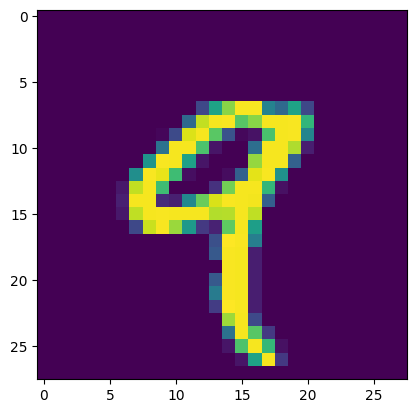

In [7]:
#Muestra la imagen del número 9
plt.imshow(np.reshape(np.array(datos.data.loc[4]), (28, 28)))
plt.show()

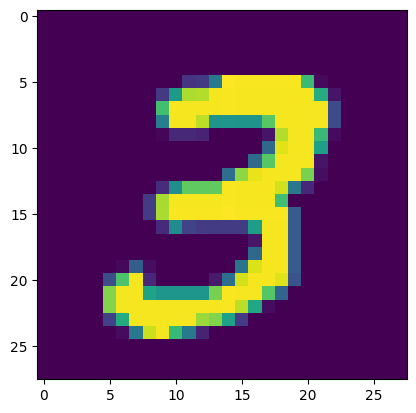

In [8]:

#Muestra la imagen del número 3
plt.imshow(np.reshape(np.array(datos.data.loc[7]), (28, 28)))
plt.show()

La siguiente tabla muestra un resumen numérico de los datos, específicamente muestra la cantidad de valores por columnas, la medias, desviación estándar, mínimo, percentil 25%, percentil 50%, percentil 75% y el máximo.


In [9]:
datos.data.describe() #Resumen estadístico de los datos

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


La tabla anterior muestra los diferentes estadísticos por cada una de las 784 columnas (imágenes o pixeles). Como necesitamos manejar por tal motivo se propone hacer un promedio de las métricas y hallar valores genéricos para todo el dataframe, esto se puede hacer con tranquilidad debido a que las diferentes 784 variables son todos pixeles y tienen una naturaleza similar. El resumen de los estadísticos de los promedios de la tabla se muestran a continuación:

In [10]:
pd.DataFrame(datos.data.describe().mean(axis = 1), columns=["Promedio"]) #Promedio de los resumenes estadísticos.

,Promedio
count,70000.000000
mean,33.385965
std,49.255704
min,0.000000
25%,0.000000
50%,12.267857
75%,62.571429
max,220.459184


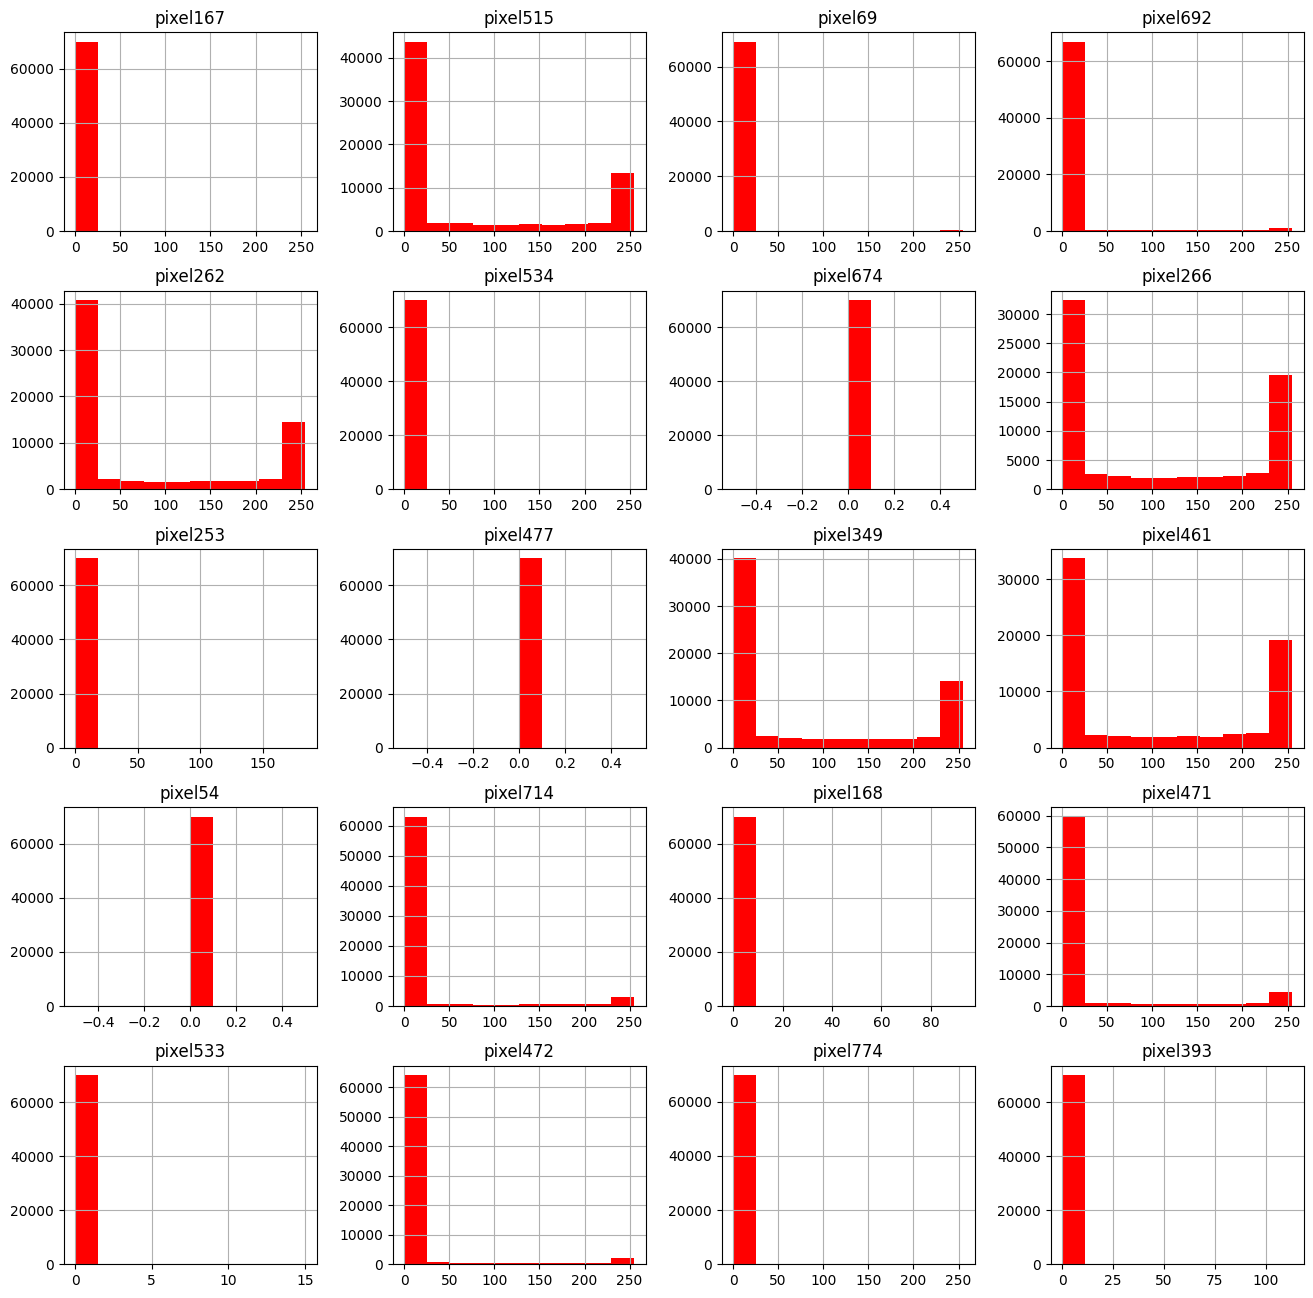

In [11]:
#Histogramas
lista_columnas = random.sample(range(0, 784), 20,)
datos.data.iloc[:,lista_columnas].hist(figsize=(16,16),color='red')
plt.show()

De lo anteriores histogramas se puede observar que la mayoría de las variables de los pixeles toma valores cero y valores cercanos a 250.

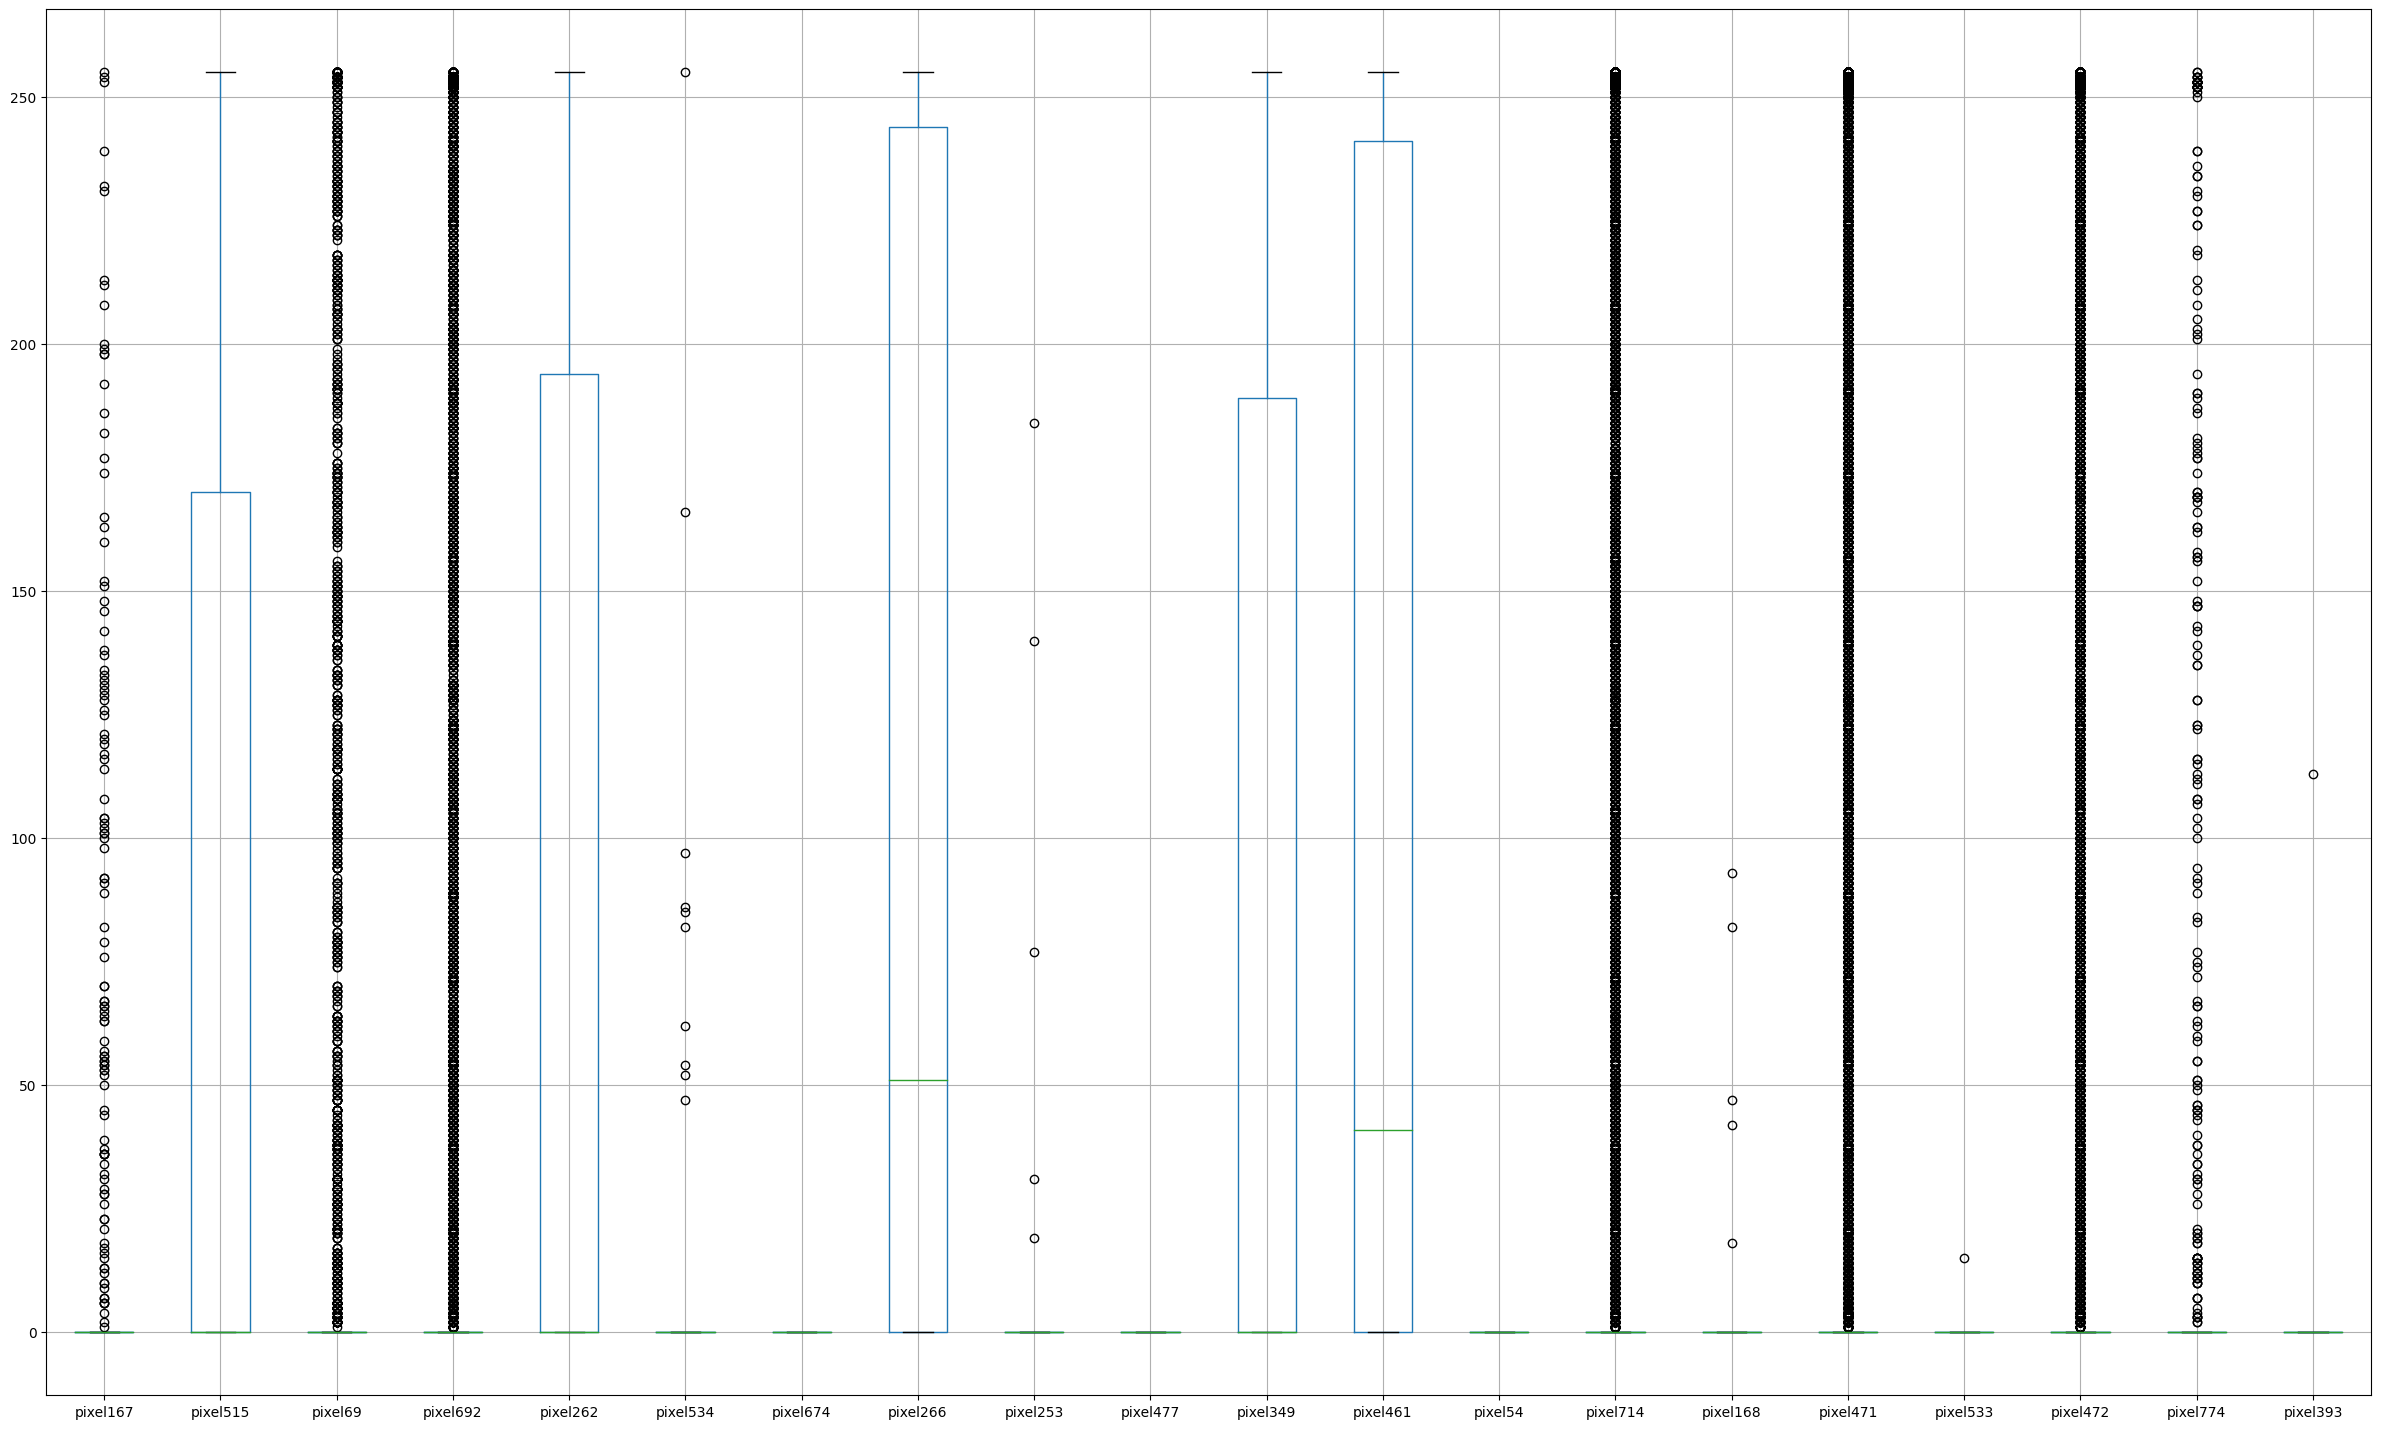

In [12]:
#Diagramas de caja
datos.data.iloc[:,lista_columnas].boxplot(figsize=(30,18))
plt.show()

Así, los diagramas de caja de cada uno de los histogramas confirma las conclusiones.

### Construcción de la Matriz de correlaciones

Una de los supuestos más importantes del método de clasificación es el hecho de que las variables son independientes, por tal motivo se observará la matriz de correlaciones para verificar esto.

In [13]:
#Cálculo de la matriz de correlaciones
datos_sin_repetidos = datos.data[datos.data.var()[datos.data.var() != 0].index]
matriz_correlaciones = datos_sin_repetidos.corr()

In [14]:
matriz_correlaciones

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
pixel13,1.000000,0.814613,0.085874,0.085874,-0.000015,-0.000024,-0.000035,-0.000046,-0.000060,-0.000079,...,-0.000244,-0.000230,-0.000207,-0.000172,-0.000135,-0.000096,-0.000069,-0.000044,-0.000034,-0.000022
pixel14,0.814613,1.000000,0.647816,0.647816,-0.000020,-0.000031,-0.000046,-0.000061,-0.000078,-0.000102,...,-0.000317,-0.000299,-0.000270,-0.000224,-0.000176,-0.000125,-0.000089,-0.000057,-0.000044,-0.000028
pixel15,0.085874,0.647816,1.000000,1.000000,-0.000014,-0.000022,-0.000032,-0.000043,-0.000055,-0.000073,...,-0.000225,-0.000212,-0.000192,-0.000159,-0.000125,-0.000088,-0.000063,-0.000040,-0.000032,-0.000020
pixel16,0.085874,0.647816,1.000000,1.000000,-0.000014,-0.000022,-0.000032,-0.000043,-0.000055,-0.000073,...,-0.000225,-0.000212,-0.000192,-0.000159,-0.000125,-0.000088,-0.000063,-0.000040,-0.000032,-0.000020
pixel33,-0.000015,-0.000020,-0.000014,-0.000014,1.000000,0.770903,-0.000032,-0.000043,-0.000055,-0.000073,...,-0.000225,-0.000212,-0.000192,-0.000159,-0.000125,-0.000088,-0.000063,-0.000040,-0.000032,-0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel776,-0.000096,-0.000125,-0.000088,-0.000088,-0.000088,-0.000135,-0.000200,-0.000266,-0.000343,-0.000449,...,-0.001393,-0.000534,0.019823,0.136315,0.574229,1.000000,0.536725,0.095282,0.010325,-0.000125
pixel777,-0.000069,-0.000089,-0.000063,-0.000063,-0.000063,-0.000097,-0.000143,-0.000190,-0.000245,-0.000322,...,-0.000998,-0.000940,-0.000657,0.019828,0.145781,0.536725,1.000000,0.586818,0.064110,-0.000089
pixel778,-0.000044,-0.000057,-0.000040,-0.000040,-0.000040,-0.000061,-0.000091,-0.000121,-0.000156,-0.000204,...,-0.000634,-0.000597,-0.000540,-0.000154,0.004778,0.095282,0.586818,1.000000,0.442278,0.206548
pixel779,-0.000034,-0.000044,-0.000032,-0.000032,-0.000032,-0.000048,-0.000071,-0.000095,-0.000122,-0.000160,...,-0.000497,-0.000468,-0.000423,-0.000351,-0.000275,0.010325,0.064110,0.442278,1.000000,0.855512


In [15]:
#Cálculo del determinante de la matriz
np.linalg.det(matriz_correlaciones.to_numpy())

0.0

Como el determinante es cercano a cero, luego existe independencia lineal, entonces hay evidencia de que existen variables correlacionadas. Por lo tanto se debe utilizar métodos para eliminar el problema de correlaciones. En nuestro caso, usaremos PCA (Análisis de componentes principales).

### Desbalanceo de datos

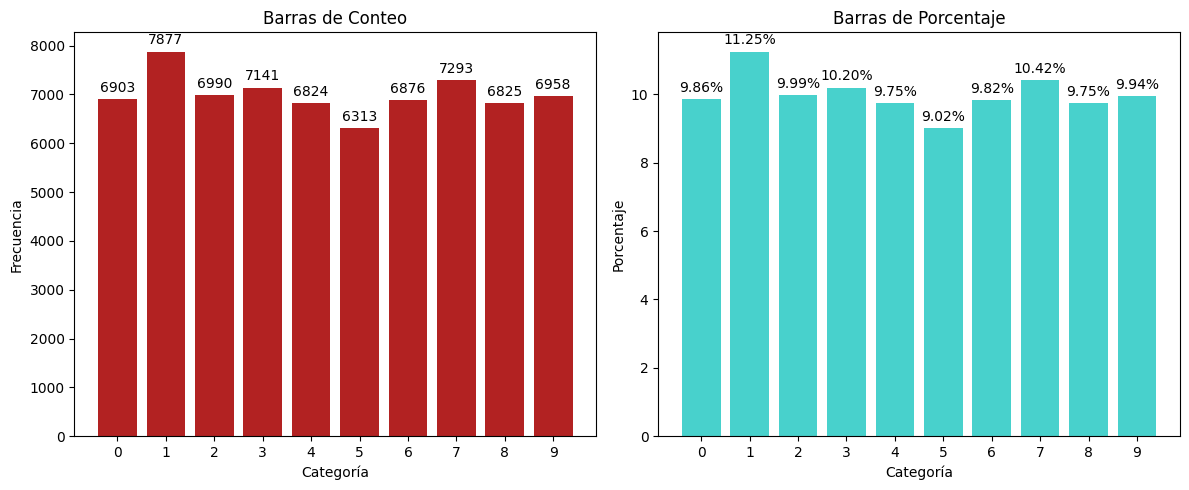

In [16]:
# gráfico de barras
conteo_categorias = datos.target.value_counts().sort_index()
porcentajes = (conteo_categorias / len(datos.target)) * 100

# Ajuste del tamaño de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 fila y 2 columnas de subplots

# Gráfico de barras de conteo
bars1 = axes[0].bar(conteo_categorias.index, conteo_categorias, color='firebrick')
axes[0].set_title('Barras de Conteo')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')

# etiquetas de las barras de conteo
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),

                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

# Gráfico de barras de porcentaje
bars2 = axes[1].bar(porcentajes.index, porcentajes, color='mediumturquoise')
axes[1].set_title('Barras de Porcentaje')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Porcentaje')

# etiquetas de porcentaje a las barras de porcentaje
for bar in bars2:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', rotation=0)

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

La anteriores graficas de barras muestran que las etiquetas tienen un porcentaje de presencia similar en la base de datos, sin embargo balancear lo datos siempre es una buena practica.

**Agrupación la tabla de las variables o pixeles con el vector objetivo o que indica las clases de cada imagen**

In [17]:
#Union de las variables con el vector de categorías correspondiente.
df_datos = pd.concat([datos.data, datos.target], axis = 1)
df_datos

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


**Método subsampling** (se encarga hacer un muestreo de cada clase con el tamaño o cantidad de datos de la clase o categoría minoritaria que para este caso es el número 5).

In [18]:
from sklearn.utils import resample

# Calcula el número mínimo de muestras en una categoría
min_muestras = df_datos['class'].value_counts().min()

# Crea un DataFrame vacío para almacenar las muestras equilibradas
df_datos_balanceado = pd.DataFrame()

# Realiza el muestreo estratificado para cada categoría
for categoria in df_datos['class'].unique():
    categoria_df = df_datos[df_datos['class'] == categoria]
    muestras_equilibradas = resample(categoria_df, replace=True, n_samples=min_muestras, random_state=42)
    df_datos_balanceado = pd.concat([df_datos_balanceado, muestras_equilibradas])

# Ahora df_balanceado contiene un conjunto de datos equilibrado

Se observa a continuación que los datos ya se encuentran balanceados con el tamaño de la clase minoritaria

In [19]:
df_datos_balanceado['class'].value_counts() #Confirmación de datos balanceados

0    6313
1    6313
2    6313
3    6313
4    6313
5    6313
6    6313
7    6313
8    6313
9    6313
Name: class, dtype: int64

Para seguir trabajando con la tabla de pixeles y el vector de clases por separa se dispone a dividir el dataframe balanceado.

In [20]:
#Separa la base para mayor facilidad
df_datos_balanceado_data = df_datos_balanceado.iloc[:,0:-1]
df_datos_balanceado_target = df_datos_balanceado.iloc[:,-1]

Es así como se realizó la **preparación de los datos** para realizar el clasificador de Naive Bayes.




## **4. Estimación de las probabilidades**

Las estimaciones de las probabilidades se realizarán utilizando el modelo de clasificador de Naive Bayes, lo cual cumple con el objetivo de nuestro proyecto.

## **5. Entrenamiento del Modelo**

Se crean los dataframes X_entreno, X_prueba, y_entreno, y_prueba, donde X_entreno es el conjunto de entrenamiento de las características, y_entreno el conjunto de entrenamiento de las categorías, X_prueba el conjunto de testeo de las características y y_prueba es el conjunto de testeo de las categorías.

El conjunto de testeo sera del (100/7)% del conjunto total de la base de datos MINST proporcio

In [21]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(df_datos_balanceado_data, df_datos_balanceado_target, test_size = 1/7.0, random_state = 1)

Se aplica **PCA** para encontrar variables independientes.

In [22]:
#Aplicación del método de análisis de componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_entreno)
entreno_x = pca.transform(X_entreno)
prueba_x = pca.transform(X_prueba)

## **6. Clasificación de nuevos ejemplos**

El proceso de clasificación se llevará a cabo en dos conjuntos de datos: el conjunto de entrenamiento original y el conjunto derivado a través de la técnica PCA. En el caso de los datos transformados mediante PCA, se empleará un clasificador de tipo Gaussian Naive Bayes, ya que las variables presentan un comportamiento continuo tras la mencionada transformación. Por otra parte, en los valores originales, que consisten en números enteros, se aplicará un modelo de clasificación basado en Bernoulli Naive Bayes.

Gaussian Naive Bayes para los datos transformados por PCA

El modelo creado con los datos transformados se nombrará por model_1

In [23]:
from sklearn.naive_bayes import GaussianNB
#Estimación del primer modelo
model_1 = GaussianNB()
model_1.fit(entreno_x, y_entreno)

GaussianNB()

**Bernoulli Naive Bayes para los datos originales**

El modelo creado con los datos originales se nombrará por model_2

In [24]:
from sklearn.naive_bayes import BernoulliNB
#Estimación del segundo modelo
model_2 = BernoulliNB()
model_2.fit(X_entreno, y_entreno)

BernoulliNB()

## **7. Evaluación del Modelo**

Para evaluar el rendimiento del modelo se utilizan las métricas precisión, recall, f1-score y accuracy.

Gaussian Naive Bayes

In [25]:
from sklearn.metrics import classification_report

#Cálculo de las métricas para el primer modelo
y_pred = model_1.predict(prueba_x)

reporte = classification_report(y_prueba, y_pred, target_names= y_prueba.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       947
           3       0.98      0.94      0.96       927
           7       0.66      0.87      0.75       883
           1       0.84      0.82      0.83       896
           6       0.88      0.82      0.85       901
           5       0.79      0.80      0.80       911
           8       0.94      0.88      0.91       874
           9       0.89      0.82      0.85       854
           2       0.85      0.83      0.84       912
           4       0.78      0.82      0.80       914

    accuracy                           0.85      9019
   macro avg       0.86      0.85      0.85      9019
weighted avg       0.86      0.85      0.85      9019



Bernoulli Naive Bayes

In [26]:
#Cálculo de las métricas para el segundo modelo
y_pred = model_2.predict(X_prueba)

reporte = classification_report(y_prueba, y_pred, target_names= y_prueba.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       947
           3       0.86      0.96      0.91       927
           7       0.86      0.84      0.85       883
           1       0.74      0.78      0.76       896
           6       0.83      0.80      0.81       901
           5       0.80      0.68      0.74       911
           8       0.90      0.90      0.90       874
           9       0.91      0.85      0.88       854
           2       0.77      0.74      0.76       912
           4       0.72      0.83      0.77       914

    accuracy                           0.83      9019
   macro avg       0.83      0.83      0.83      9019
weighted avg       0.83      0.83      0.83      9019



Como se puede evidenciar respecto a las métricas el mejor modelo es el Naive Bayes Gaussiano que utiliza lo datos transformados por el PCA, por lo tanto se escoge este modelo.

## **8. Ajuste y Optimización del Modelo**

El rendimiento del modelo es satisfactorio y para efecto de este trabajo no se realizará ningún ajuste al modelo.

## **9. Predicciones**

Se realizarán predicciones por medio de los dos modelos que se estimaron al conjunto de datos de testeo.

Predicciones del modelo con datos transformados por PCA

In [27]:
#Cálculo de las predicciones para el primer modelo
pred_y = model_1.predict(prueba_x)
pred_y

array(['0', '3', '9', ..., '1', '7', '6'], dtype='<U1')

Predicciones del modelo con datos originales

In [28]:
#Cálculo de las predicciones para el segundo modelo
pred_y_2 = model_2.predict(X_prueba)
pred_y_2

array(['0', '3', '1', ..., '1', '7', '6'], dtype='<U1')

## Despliegue del Modelo

Debido a que el objetivo del proyecto es hacer una aplicación del método de clasifaición Naive Bayes entonces el despliege no es un paso que se va tener encuenta.

## Monitoreo y Mantenimiento

Igualmente al paso anterior este paso no es necesario para los objetivos del presente notebook.

## Generación de dígitos nuevos

Por medio de la log probabilidades que arroja el modelo se pueden generar números aleatorios 0 y 1 para poder gráficarlos, se espera que las imágenes resultantes se asemejen a los números o categorías que se trabajaron de acuerdo a las probabilidades que se estén utilizando.

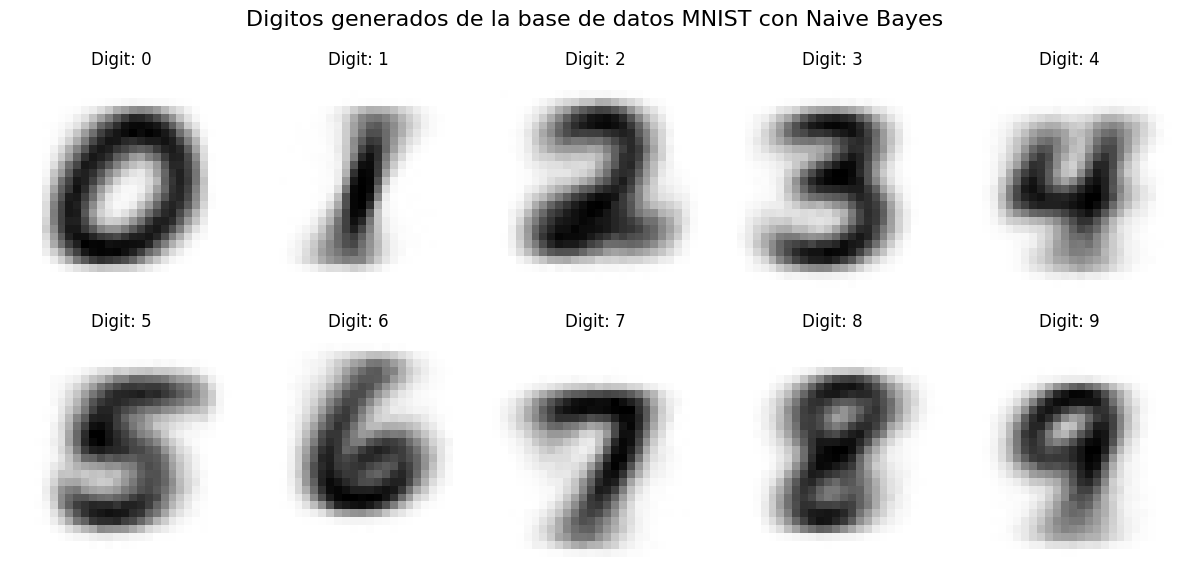

In [30]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
probability = np.exp(model_2.feature_log_prob_)
# Enumerar las etiquetas y sus correspondientes probabilidades
labels = list(range(10))

# Generar y mostrar las imágenes

for i, ax in enumerate(axs.flatten()):
    # Generar una imagen binaria usando las probabilidades condicionales

    vec_generated_total = pd.DataFrame()
    for j in range(1000):
        vec_generated = np.random.binomial(1, probability[i])
        vec_generated_total[j] = vec_generated
    vec_generated_total = vec_generated_total.mean(axis = 1)

    img = np.array(vec_generated_total).reshape((28, 28))

    # Mostrar la imagen en escala de grises invertida (cmap="gray_r")
    ax.imshow(img, cmap="gray_r")

    # Configurar título y etiquetas de ejes
    ax.set_title(f"Digit: {labels[i]}")
    ax.axis("off")  # Ocultar los ejes

# Título general
plt.suptitle("Digitos generados de la base de datos MNIST con Naive Bayes", fontsize=16)

# Ajustar el espaciado entre subfiguras
plt.tight_layout()

# Mostrar la figura

## Conclusiones

En conclusion, se tiene el algoritmo del clasificador de Naive Bayes con la base de datos propuesta, mostrando los pasos establecidos en la introducción.